<a href="https://colab.research.google.com/github/sinankurtman/PyTorch-Tutorial-Youtube/blob/main/HandWriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torch import nn
import torch.optim as optim
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


In [ ]:
# Load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


100%|██████████| 9.91M/9.91M [00:01<00:00, 6.11MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 161kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.97MB/s]


In [ ]:
# Visualize some images
def show_images(images, labels, label_header="True"):
  figure = plt.figure(figsize=(10, 10))
  rows, cols = 5, 5
  for i in range(1, rows*cols+1):
    figure.add_subplot(rows, cols, i)
    plt.axis(False)
    plt.title(f"{label_header}: {labels[i-1].item()}")
    plt.imshow(images[i-1].permute(1,2,0), cmap='gray')

  plt.show()

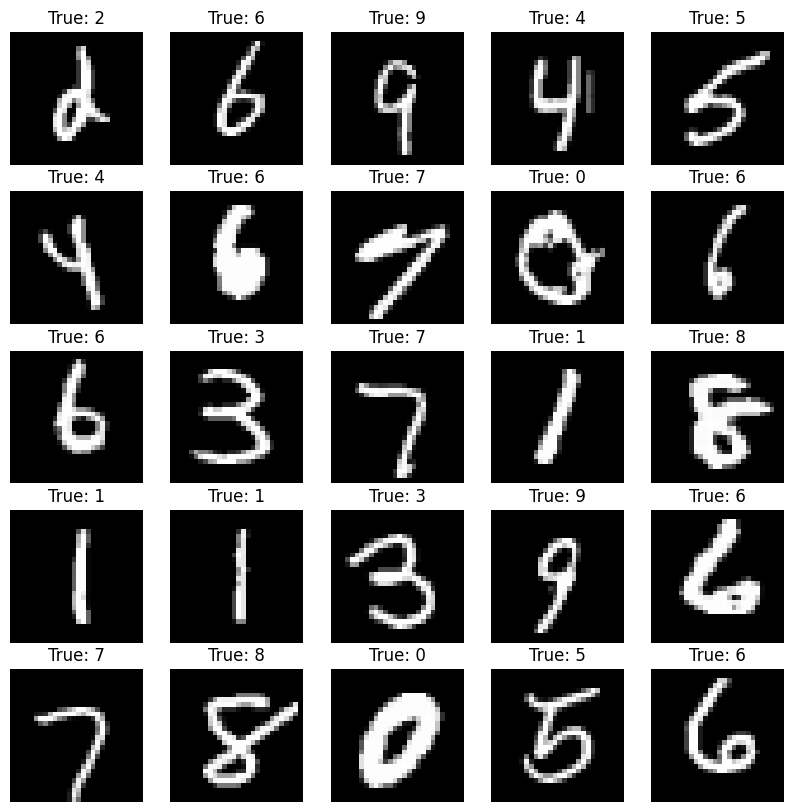

In [ ]:
images, labels = next(iter(trainloader))
show_images(images, labels, "True")


In [ ]:
# Define the CNN model
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2)
    )
    self.fc = nn.Sequential(
        nn.Flatten(),
        nn.Linear(64 * 7 * 7, 128),
        nn.Linear(128, 10)
    )
  def forward(self, x):
      x = self.conv(x)
      x = self.fc(x)
      return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Initialize the model, loss function, and optimizer
net = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [ ]:
# Training the CNN
for epoch in range(5):
  running_loss = 0.0
  for idx, (inputs, labels) in tqdm(enumerate(trainloader), total=len(trainloader)):

    inputs = inputs.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  print(f'Epoch {epoch+1}, Loss: {running_loss/100:.3f}')

print("Finished Training")

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 1, Loss: 8.381


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 2, Loss: 2.667


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 3, Loss: 1.924


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 4, Loss: 1.446


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 5, Loss: 1.173
Finished Training


In [ ]:
# Evaluating the CNN on test data
correct = 0
total = 0
with torch.no_grad():
  for (images, labels) in testloader:
    images = images.to(device)
    labels = labels.to(device)

    outputs = net(images)
    predicted = outputs.argmax(1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f}%')


Accuracy of the network on the 10000 test images: 96.99%


In [ ]:
# Test on some images
images, labels = next(iter(testloader))
with torch.no_grad():
  pred = net(images.to(device))
  pred = pred.argmax(1)


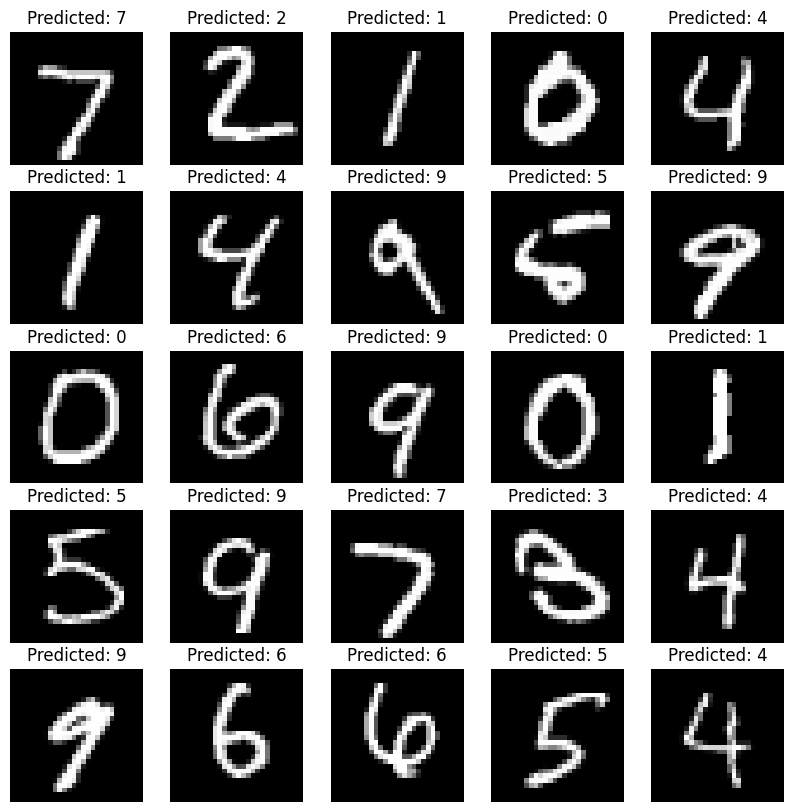

In [ ]:
show_images(images, pred, "Predicted")
